In [1]:

import sys
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np

# Import Image 

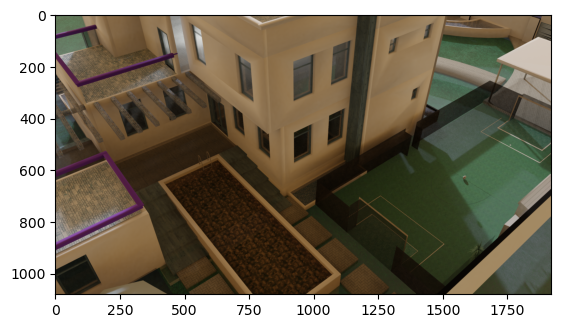

In [2]:
img1 = cv.imread("/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame1.png")

plt.imshow(img1)
# cv.imshow("Display window1", img1)
# cv.waitKey(0)


In [15]:
img2 = cv.imread("/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame2.png")
# cv.imshow("Display window2", img2)
# cv.waitKey(0)


# Convert to Grey

In [17]:
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)

gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>

# Detect Salient Features

## Spply SIFT Detector

In [129]:
%matplotlib notebook

sift = cv.SIFT_create()
keyPointsLeft, descriptorsLeft = sift.detectAndCompute(img1,
                                                       None)
  
keyPointsRight, descriptorsRight = sift.detectAndCompute(img2,
                                                         None)
   
kp1, des1 = sift.detectAndCompute(gray1,None)

img1_kp =cv.drawKeypoints(gray1,kp1,img1,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(dpi=600)
plt.yticks(np.arange(0, 1080, 50))
plt.xticks(np.arange(0, 1920, 100))
plt.imshow(img1_kp)


kp2, des2 = sift.detectAndCompute(gray2,None)
img2_kp =cv.drawKeypoints(gray2,kp2,img2,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(dpi=600)
plt.yticks(np.arange(0, 1080, 50))
plt.xticks(np.arange(0, 1920, 100))
plt.imshow(img2_kp)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Brute Force Matching

##  BFMatcher with default params

In [72]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)


## Apply ratio Test

In [78]:
good = []

for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])



## cv.drawMatchesKnn expects list of lists as matches.

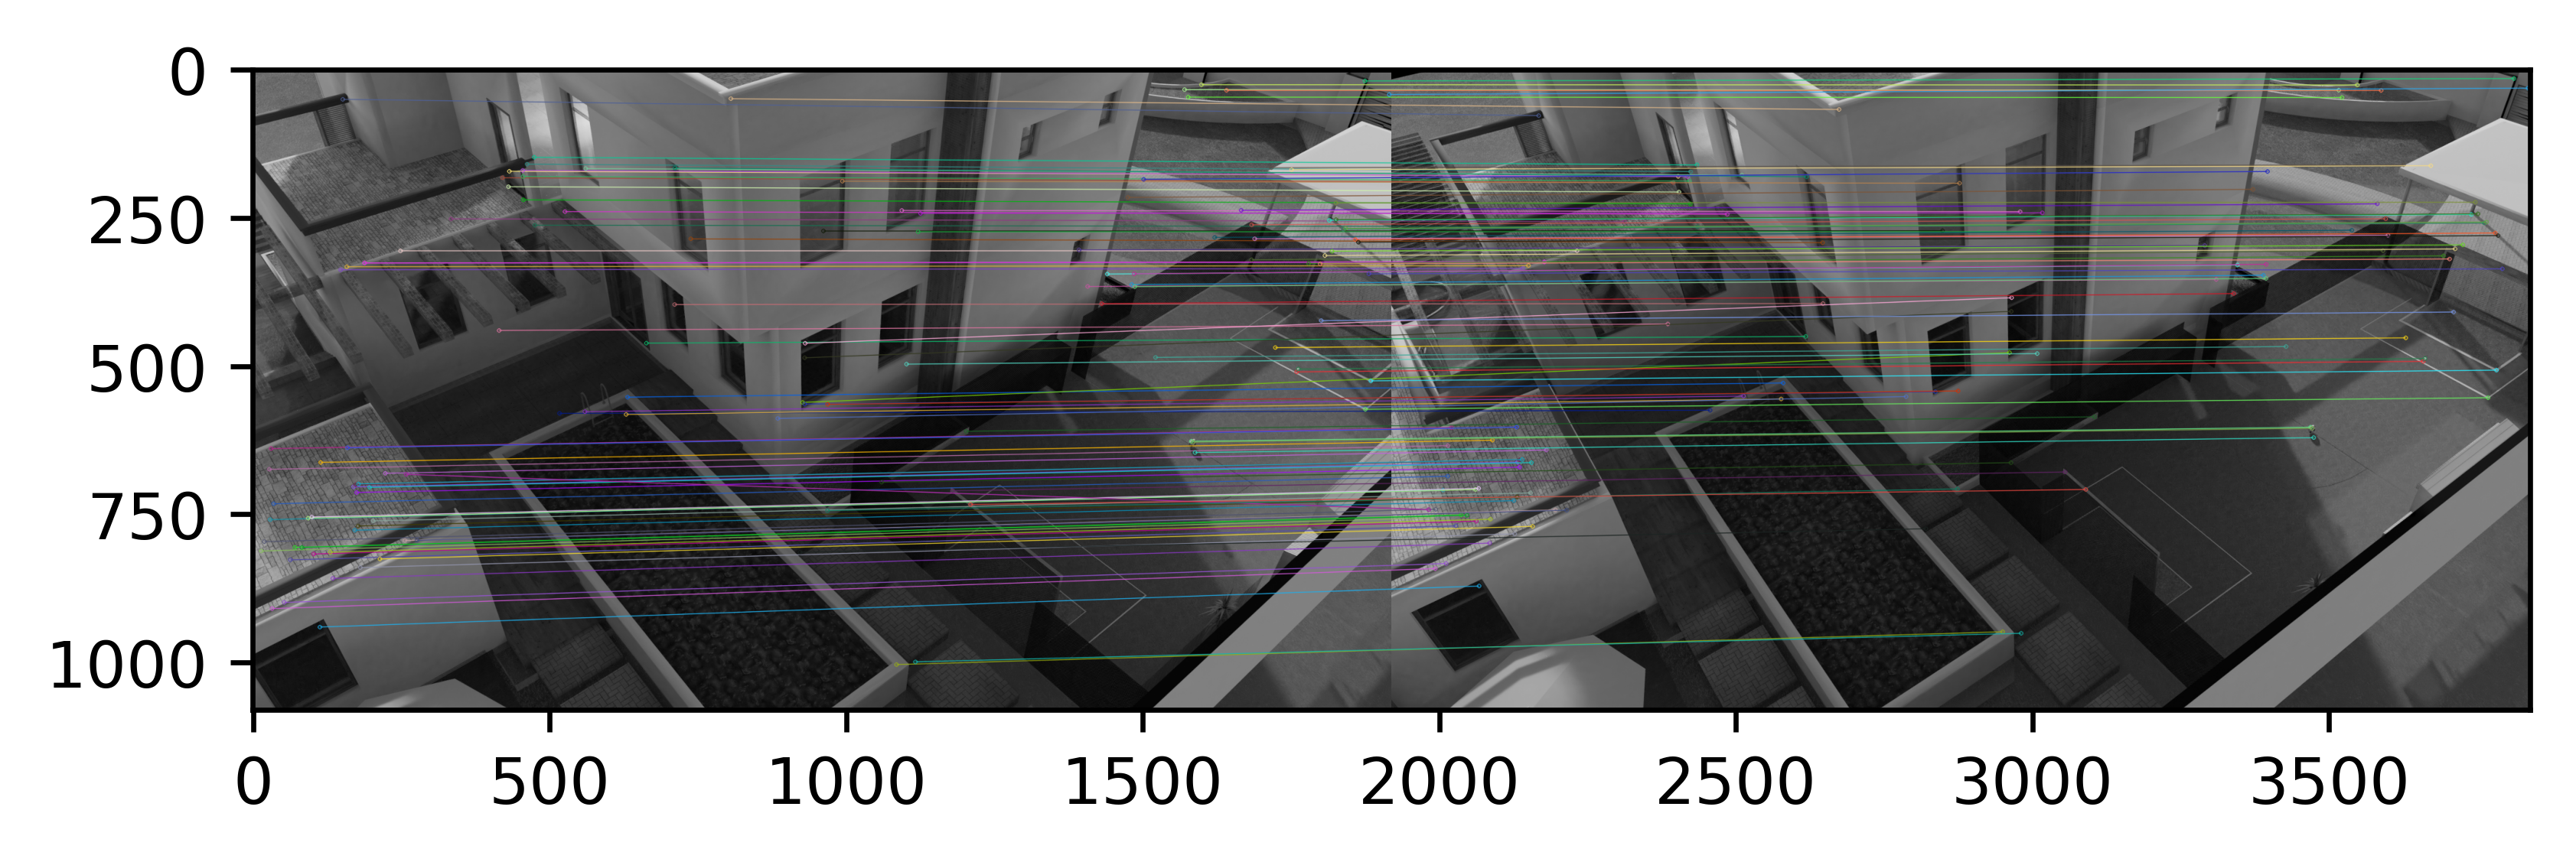

(<matplotlib.image.AxesImage at 0x166ec40d0>, None)

In [79]:
img3 = cv.drawMatchesKnn(gray1,kp1,gray2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(dpi=600)
plt.imshow(img3),plt.show()



# Computing Fundamental Matrix

## Theory

In [44]:
# Assume Camera 1 coincide with the word coordianates
K_1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
[0.000e+00, 1.600e+03, 5.395e+02],
[0.000e+00, 0.000e+00, 1.000e+00]])

K_2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
[0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])


#############################################################################
C_after_rect = np.array([0, 0, 0, 1]).reshape(4,1)

R_t1 = np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
[-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
[ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
[ 0., 0., 0., 1.]])

R_t2 = np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
[-0.5041514, 0.39832053, -0.76627171, -1.79913743],
[ 0.6356793, -0.42945388, -0.64146805, 26.26804151]])

P_1 = np.dot(K_1, R_t1[:3,:])
P_2 = np.dot(K_2, R_t2)


R = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
[ 0.00362138, 0.99999203, -0.00174044],
[-0.07497205, 0.00200697, 0.99718366]])

t = np.array([[-1.98989457],[0.00265269],[0.209795081]])


def skew(v):
    if len(v) == 4: v = v[:3]/v[3]
    skv = np.roll(np.roll(np.diag(v.flatten()), 1, 1), -1, 0)
    return skv - skv.T

e_2 = skew(np.dot(P_2, np.linalg.pinv(R_t1)@C_after_rect))

P_ = np.linalg.pinv(P_1)


computed_F = np.dot(np.dot(np.dot(skew(np.dot(K_2, t)), K_2), R), np.linalg.inv(K_1))
fund_matrix2 = e_2@P_2@P_


print(computed_F/computed_F[2,2])

print(P_1.shape)
print(P_2.shape)

[[ 7.64315164e-09  1.67264740e-06 -9.48129532e-04]
 [-4.78516075e-07 -2.60194129e-08 -2.50407946e-02]
 [ 3.58785898e-04  2.20686928e-02  1.00000000e+00]]
(3, 4)
(3, 4)


In [51]:
# K_1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
# [0.000e+00, 1.600e+03, 5.395e+02],
# [0.000e+00, 0.000e+00, 1.000e+00]])
# I3 = np.ones((3,3))
# zeros = np.array([[0,0,0]]).T
# I3_0 = np.concatenate((I3, zeros), axis=1)

# P_1 = K_1@I3_0


# K_2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
# [0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
# [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
# R_vec = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
# [ 0.00362138, 0.99999203, -0.00174044],
# [-0.07497205, 0.00200697, 0.99718366]])
# t_vec = np.array([[-1.98989457],[0.00265269],[0.209795081]])
# R_t_vec = np.concatenate((R_vec, t_vec), axis=1)

# P_2 = K_2@R_t_vec



image1_coordinates = np.array([[628.1,427.6,1068.3,1658.6,1006.7],[563.5,654.4,1002.6,337.5,736.6]])


image2_coordinates = np.array([[657.7,469.4,1017,1655.8,993.2],[538.6,622.4,947.9,327.6,697.7]])


word_coordiantes = cv.triangulatePoints(P_1, P_2,image1_coordinates,image2_coordinates)

print(word_coordiantes)
print(word_coordiantes.T)



euclidean = cv.convertPointsFromHomogeneous(word_coordiantes.T)
print(euclidean)

sp_width = np.linalg.norm(euclidean[0,:] - euclidean[1,:])
sp_length = np.linalg.norm(euclidean[1,:] - euclidean[2,:])
sp_area = sp_length*sp_width

ff_length = np.linalg.norm(euclidean[3,:] - euclidean[4,:])

print(sp_width, sp_length, ff_length)

print("")
print(f"The length of swimming pool is {sp_length}.")
print(f"The width of swimming pool is {sp_width}.")
print(f"The area of swimming pool is {sp_area}.")

print(f"The length of football field is {ff_length}.")




[[-0.33423601 -0.22866729  0.92574287 -0.47121059  0.95829243]
 [ 0.91096279  0.96009168 -0.36552572 -0.87948026 -0.24907162]
 [ 0.11422176  0.09393059 -0.04515992  0.00513069  0.02323101]
 [ 0.21304102  0.13081391 -0.08574185  0.06669875 -0.13820013]]
[[-0.33423601  0.91096279  0.11422176  0.21304102]
 [-0.22866729  0.96009168  0.09393059  0.13081391]
 [ 0.92574287 -0.36552572 -0.04515992 -0.08574185]
 [-0.47121059 -0.87948026  0.00513069  0.06669875]
 [ 0.95829243 -0.24907162  0.02323101 -0.13820013]]
[[[ -1.568881     4.27599703   0.53614912]]

 [[ -1.74803505   7.33937018   0.71804745]]

 [[-10.79686147   4.26309588   0.52669641]]

 [[ -7.06475903 -13.18585828   0.07692336]]

 [[ -6.93409227   1.80225321  -0.1680969 ]]]
3.073993857852149 9.559358682303817 14.990683602513355

The length of swimming pool is 9.559358682303817.
The width of swimming pool is 3.073993857852149.
The area of swimming pool is 29.385409874407546.
The length of football field is 14.990683602513355.


## Sample

In [100]:
# Find Keypoints
# See above

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.5*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)


pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
estimated_F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)
print(estimated_F)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

print(len(pts1))


[[ 6.65818939e-09  6.44279503e-06 -3.23468660e-03]
 [-5.55641841e-06  4.18131899e-07 -1.80332542e-02]
 [ 2.69160807e-03  1.51039646e-02  1.00000000e+00]]
103


In [89]:
# Function for drawing lines

def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

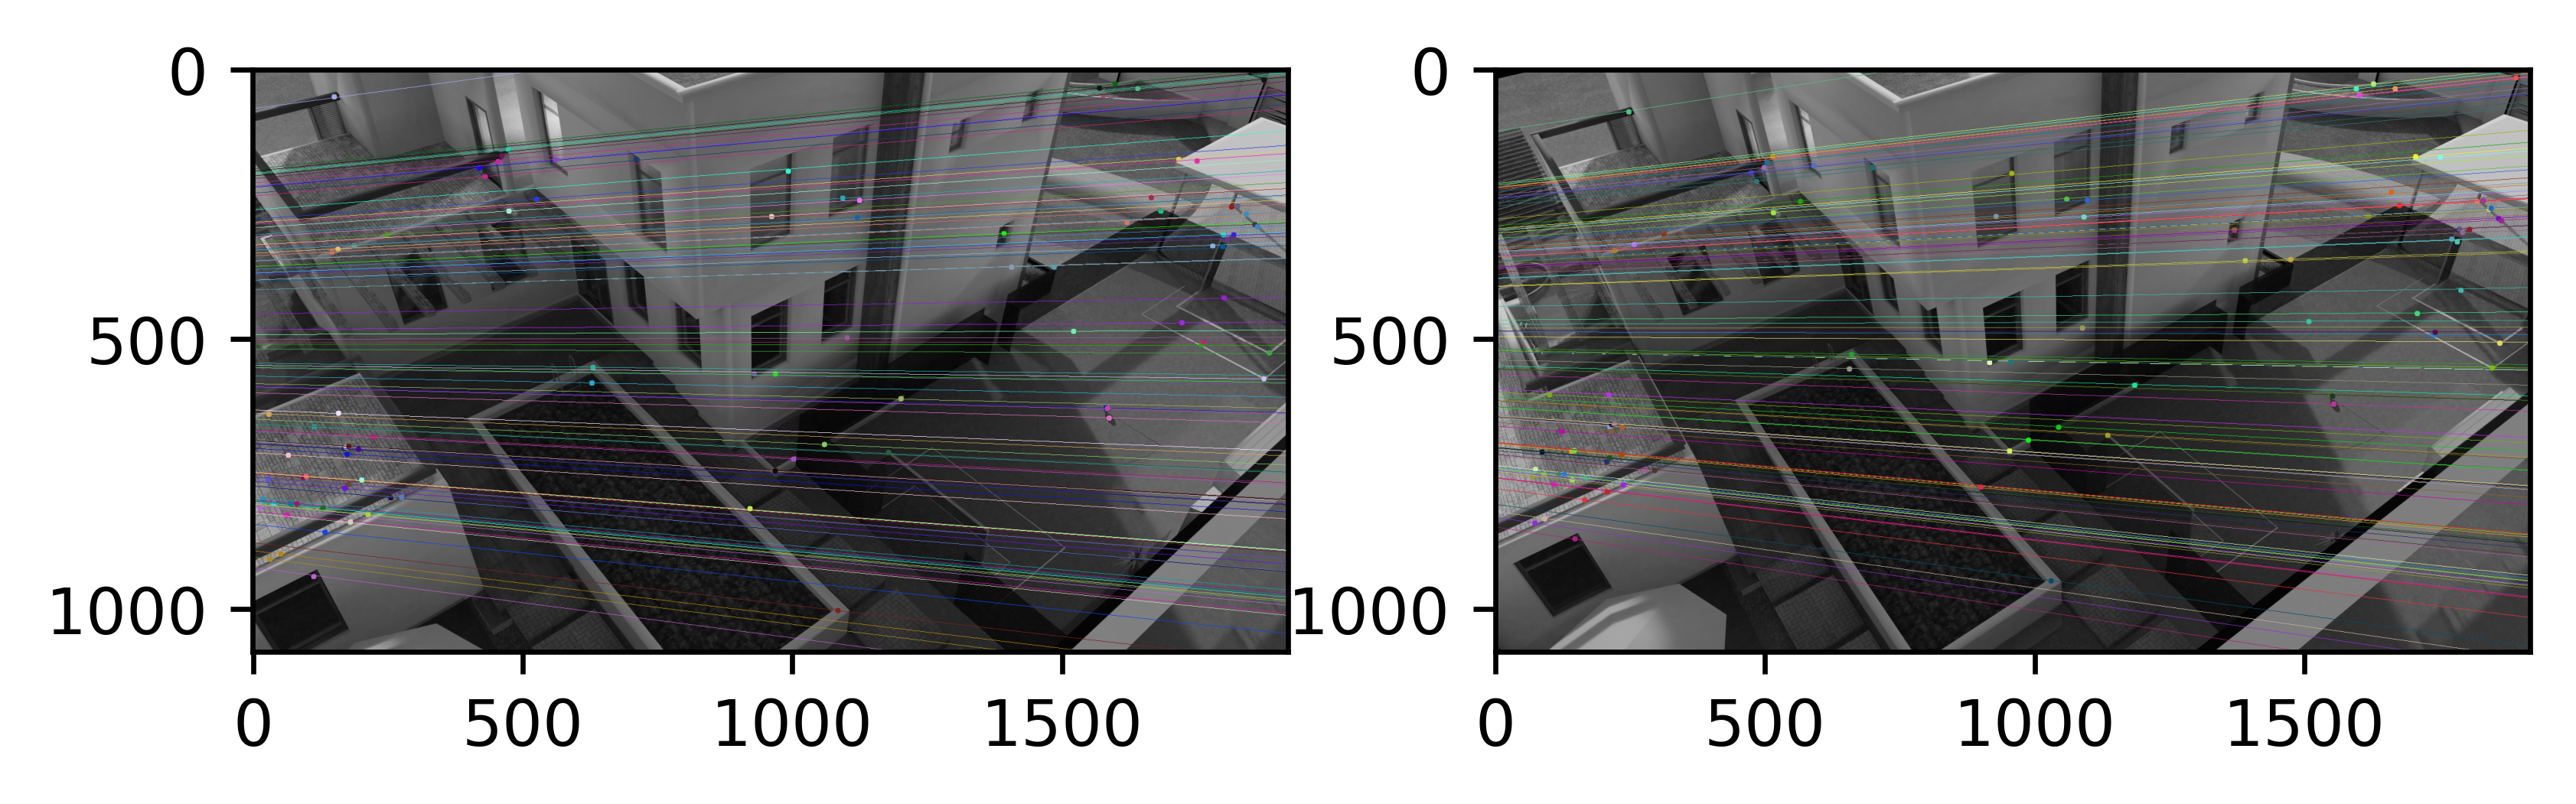

In [108]:
img1 = cv.imread("/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame1.png",0)
img2 = cv.imread("/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame2.png",0)
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,estimated_F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,estimated_F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.figure(dpi=600)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

## Disparity Map

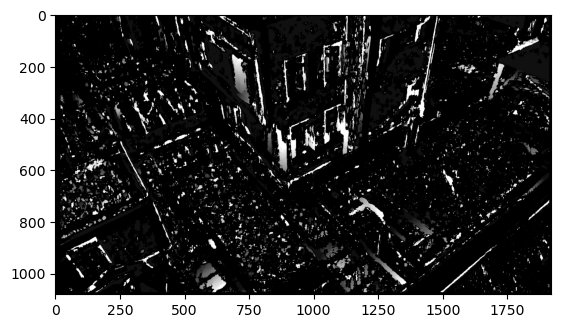

In [53]:
imgL = cv.imread('/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame1.png',0)
imgR = cv.imread('/Users/cdllyyy/Desktop/Computer_Vision/coursework/Data/Frame2.png',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()



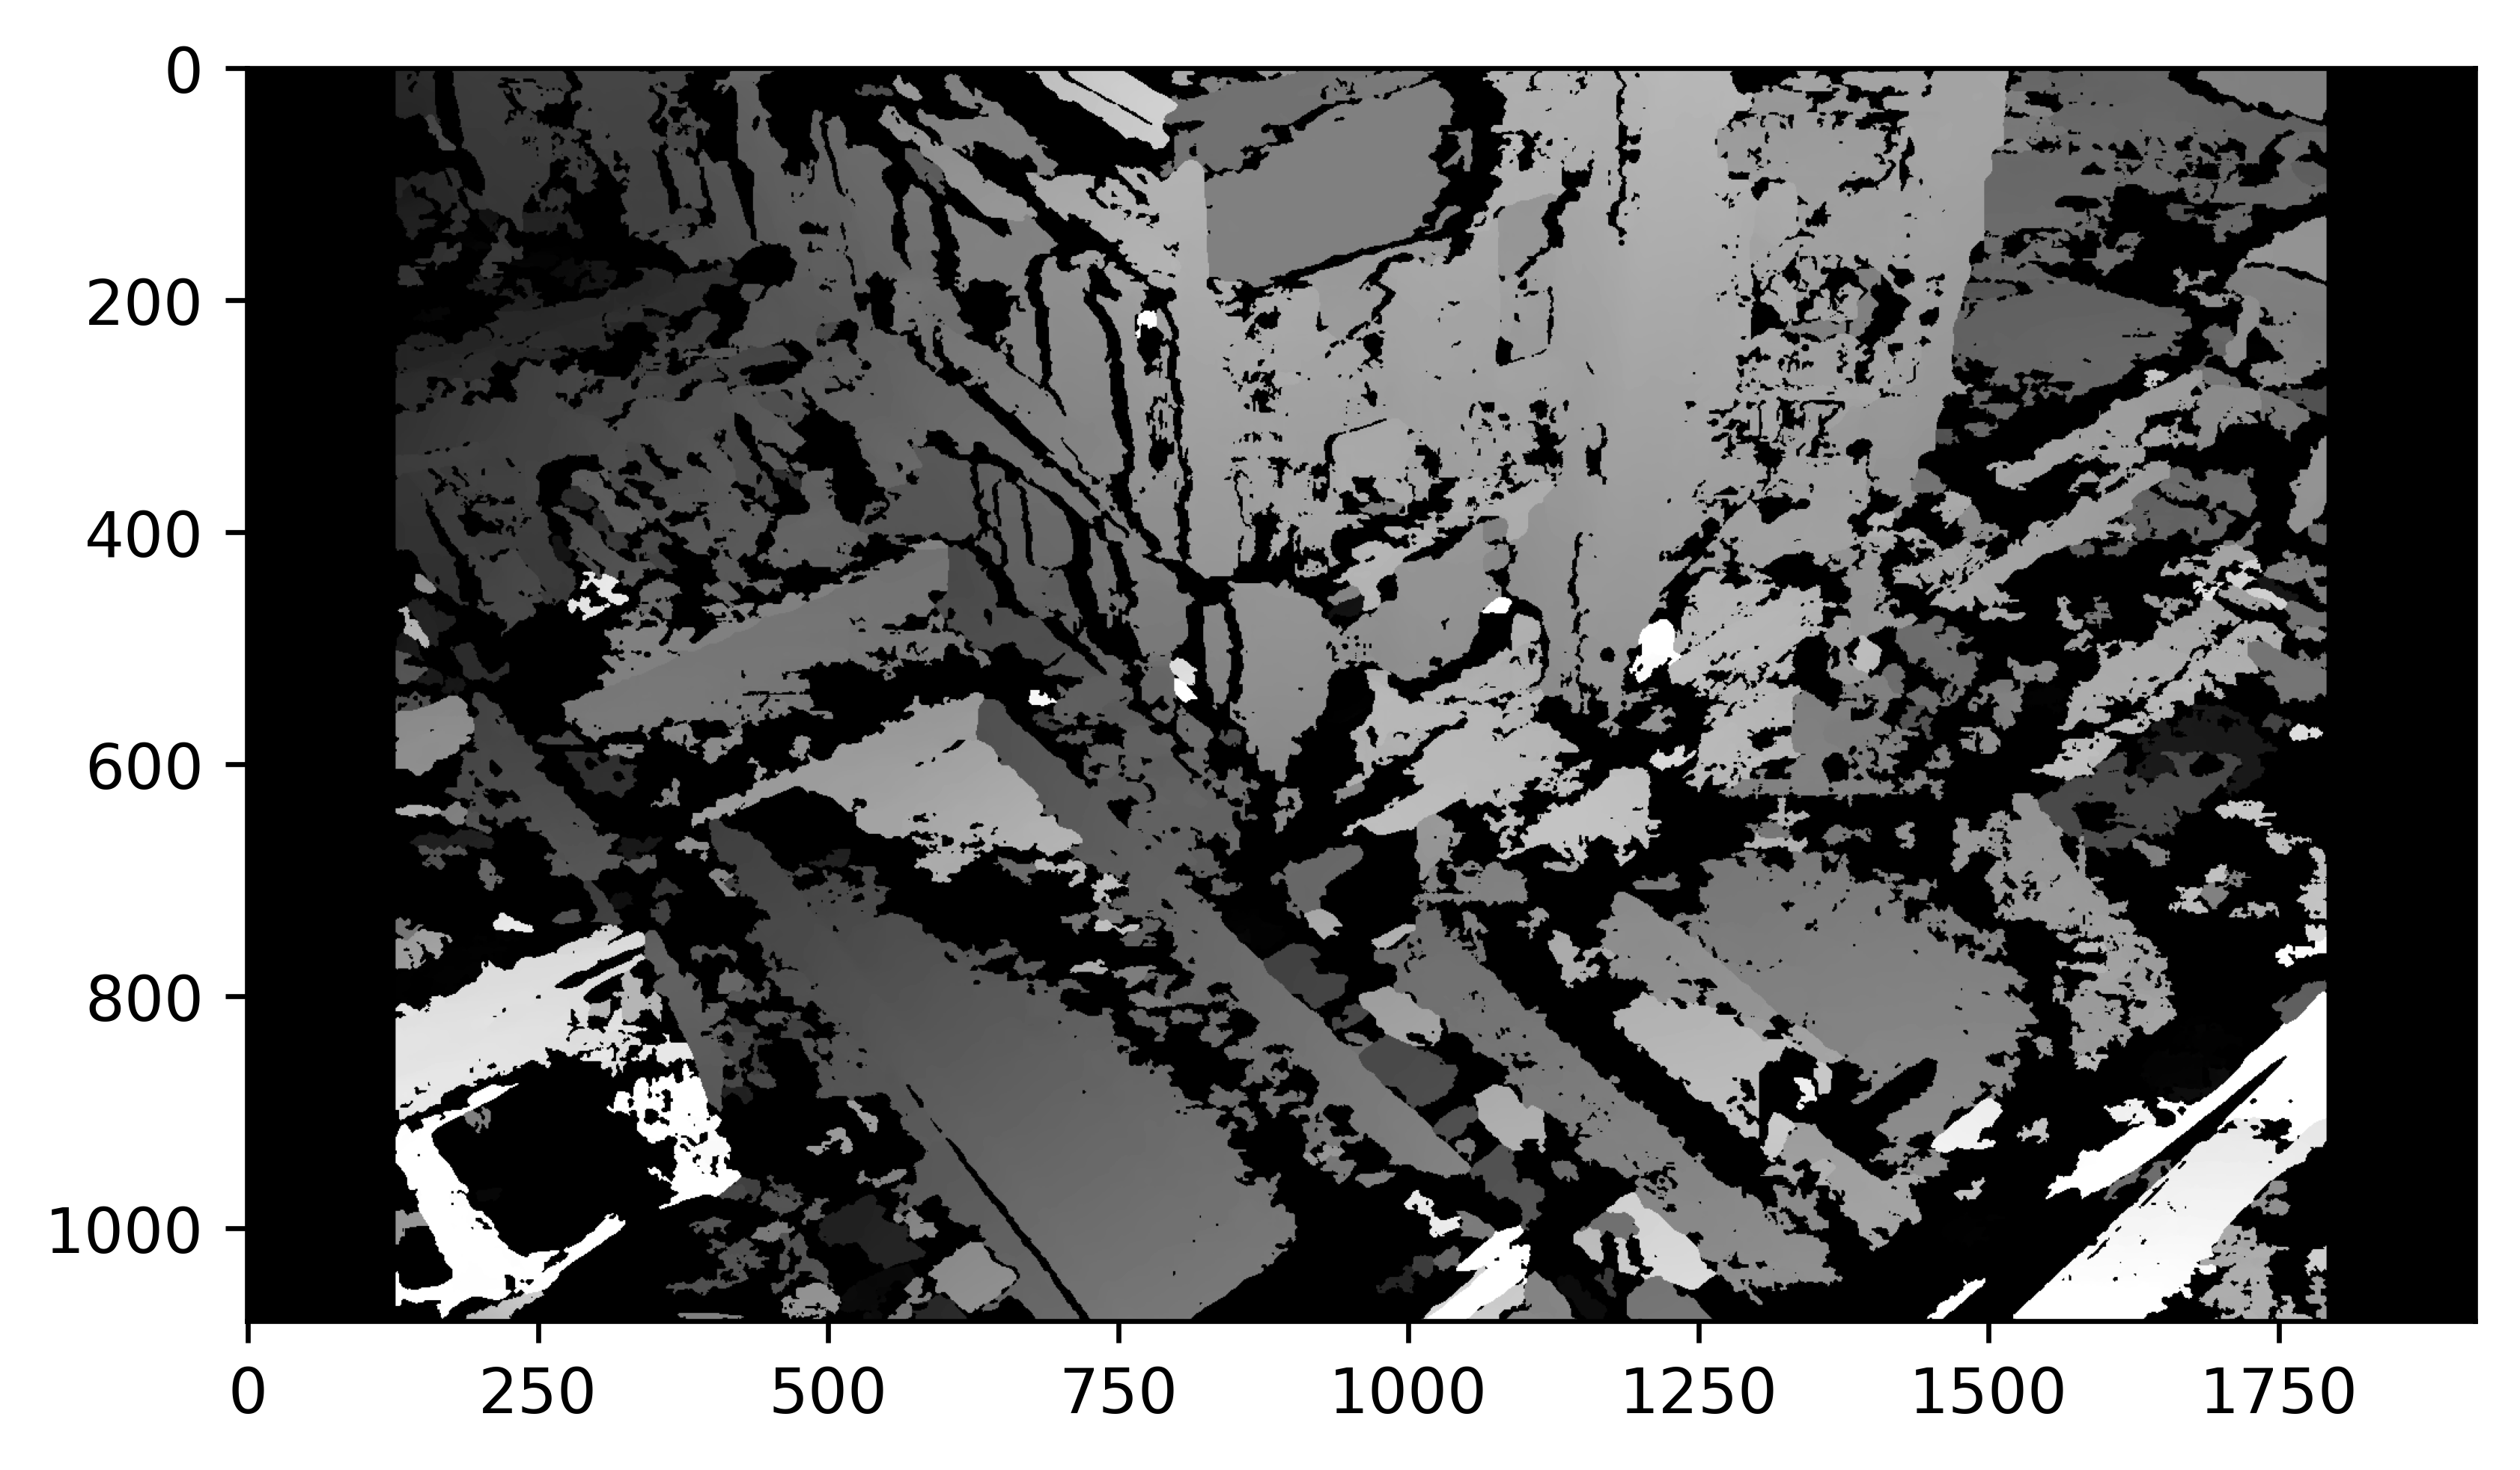

(1080, 1920)


In [54]:
# Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
block_size = 11
min_disp = -128
max_disp = 128
# Maximum disparity minus minimum disparity. The value is always greater than zero.
# In the current implementation, this parameter must be divisible by 16.
num_disp = max_disp - min_disp
# Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
# Normally, a value within the 5-15 range is good enough
uniquenessRatio = 5
# Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
# Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
speckleWindowSize = 200
# Maximum disparity variation within each connected component.
# If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
# Normally, 1 or 2 is good enough.
speckleRange = 2
disp12MaxDiff = 0

stereo = cv.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    uniquenessRatio=uniquenessRatio,
    speckleWindowSize=speckleWindowSize,
    speckleRange=speckleRange,
    disp12MaxDiff=disp12MaxDiff,
    P1=8 * 1 * block_size * block_size,
    P2=32 * 1 * block_size * block_size,
)
disparity_SGBM = stereo.compute(imgL, imgR)

# Normalize the values to a range from 0..255 for a grayscale image
disparity_SGBM = cv.normalize(disparity_SGBM, disparity_SGBM, alpha=255,
                              beta=0, norm_type=cv.NORM_MINMAX)
disparity_SGBM = np.uint8(disparity_SGBM)

plt.figure(dpi=600)

plt.imshow(disparity_SGBM,'gray')
plt.show()
# cv.imshow("Disparity", disparity_SGBM)
# cv.imwrite("disparity_SGBM_norm.png", disparity_SGBM)
print(disparity_SGBM.shape)

## 3D reconstruction

In [115]:

R_t_vec = np.array([[ 0.9971792 , -0.00348069, 0.07497863,-1.98989457],
[ 0.00362138, 0.99999203, -0.00174044,0.00265269],
[-0.07497205, 0.00200697, 0.99718366,0.209795081],
[0,0,0,1]])

word_coordiantes = cv.reprojectImageTo3D(disparity_SGBM, R_t_vec )
print(word_coordiantes.shape)




(1080, 1920, 3)
